In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from keras import layers
from keras import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3, ))
])

In [3]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

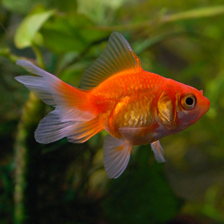

In [4]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
image_labels = []

with open('ImageNetLabels.txt', 'r') as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

In [11]:
# Importing the dataset form the flower classification folder
data_dir = '..\\Flowers Classification\\datasets\\flower_photos'

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('../Flowers Classification/datasets/flower_photos')

In [13]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [14]:
flower_image_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [15]:
flower_image_labels = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [16]:
str(flower_image_dict['roses'][0])

'..\\Flowers Classification\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [18]:
img = cv2.resize(img, IMAGE_SHAPE)

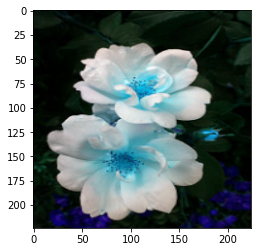

In [19]:
plt.imshow(img)

In [20]:
x, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, IMAGE_SHAPE)
        x.append(img)
        y.append(flower_image_labels[flower_name])
y[:5]

[0, 0, 0, 0, 0]

In [21]:
x = np.array(x)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

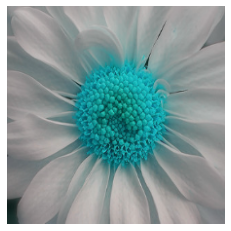

In [24]:
plt.axis('off')
plt.imshow(x[0])

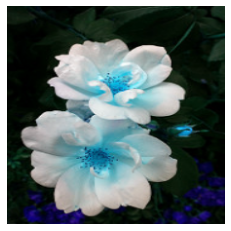

In [25]:
plt.axis('off')
plt.imshow(x[1531])

In [26]:
predicted = classifier.predict(np.array([x[0], x[2], x[1531]]))
predicted = np.argmax(predicted, axis=1)

In [27]:
predicted

array([795, 795, 795], dtype=int64)

In [28]:
image_labels[880]

'umbrella'

In [29]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False
)

In [30]:
number_of_flowers = 5

model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(number_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 79s 853ms/step - loss: 0.7708 - accuracy: 0.7220
Epoch 2/5
86/86 [==============================] - 72s 840ms/step - loss: 0.4149 - accuracy: 0.8601
Epoch 3/5
86/86 [==============================] - 76s 884ms/step - loss: 0.3304 - accuracy: 0.8892
Epoch 4/5
86/86 [==============================] - 75s 874ms/step - loss: 0.2770 - accuracy: 0.9066
Epoch 5/5
86/86 [==============================] - 74s 866ms/step - loss: 0.2437 - accuracy: 0.9237


In [32]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 27s 825ms/step - loss: 0.3474 - accuracy: 0.8715


[0.34735843539237976, 0.8714597225189209]

**When we weren't using transfer learning and making a model from scratch then we had a accuracy of 62.20% and even with the help of data augmentation and drop out layer the accuracy increased to 68.95%**

**Now after using transfer learning we are getting an accuracy of 93.35% on train dataset and 87.91% on test dataset.**

**Hence we should always prefer to have a transfer learning algorithm, if we don't find a transfer learning algorithm then we can make the model from scratch.**